In [1]:
# keyboard shortcut for comments is Ctrl+/

#=
    this is a
    multi-line
    comment
=#

### Basic Math

In [3]:
1 + 1

2

let's implement: $ 1 + (2-3)^4 \times 5 $ and see that Julia respects the order of operations (just like Python)

In [7]:
1 + (2 - 3)^4 * 5

6

### Boolean Algebra

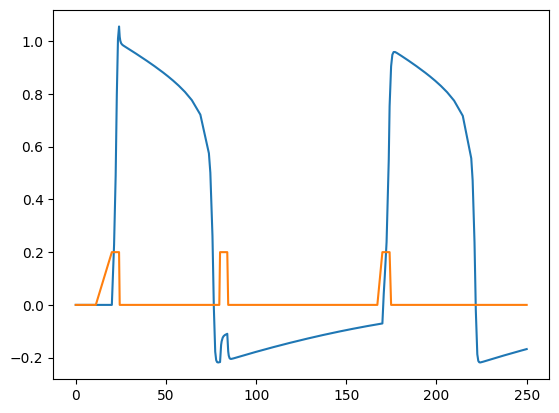

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffb166f8b50>

In [9]:
using DynamicalSystems, OrdinaryDiffEq, PyPlot
ds = Systems.fitzhugh_nagumo([0.0, 0.0]; I=0.0)
pulses_start = [20, 80, 170]
pulses_end = pulses_start .+ 4 # 4 = pulse width
pulses = sort!(vcat(pulses_start, pulses_end))
I = 0.2 # strength of pulses of I current
# Create the "callbacks": events in ODE solution
condition(u, t, integ) = t ∈ pulses # trigger condition
function affect!(integ) # what happens at the integrator
    i = integ.t ∈ pulses_start ? I : 0.0
    integ.p[4] = i # 4th parameter is value of current I
end
cb = DiscreteCallback(condition, affect!)
# transform `ds` to form allowing callbacks and solve:
prob = ODEProblem(ds, (0.0, 250.0))
sol = solve(prob, Tsit5(); callback=cb, tstops=pulses)
plot(sol.t, sol[1, :]) # plot timeseries of u
pulse_ts = [any(x -> x ≤ t ≤ x + 4, pulses_start) ? I : 0.0
            for t in sol.t]
plot(sol.t, pulse_ts)

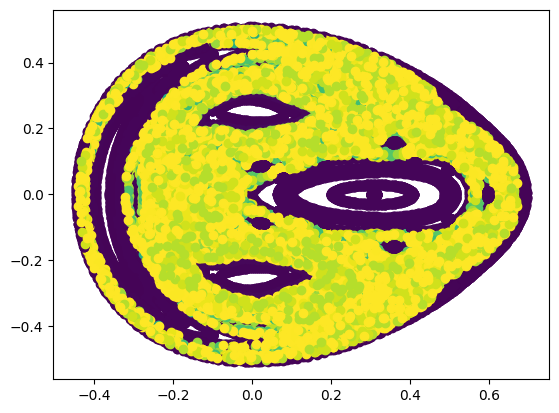

In [11]:
using DynamicalSystems, PyPlot
hh = Systems.henonheiles()
# create some initial conditions, all at energy = 0.13
ics = Systems.henonheiles_ics(0.13, 15)
cmap = matplotlib.cm.get_cmap("viridis")
for ic in ics
    psos = poincaresos(hh, (1, 0.0), 2000; u0=ic)
    λ = lyapunov(hh, 10000; u0=ic)
    v = clamp(λ / 0.06, 0, 1)
    scatter(psos[:, 2], psos[:, 4]; color=cmap(v))
end